In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-02-26 07:04:56 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


In [ ]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2




<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

In [ ]:
using Pkg

In [ ]:
Pkg.add(url="https://github.com/JuliaQuantumControl/GRAPELinesearchAnalysis.jl.git")

In [ ]:
Pkg.add("QuantumControl")

In [ ]:
using GRAPELinesearchAnalysis

In [ ]:
using QuantumControl

In [ ]:
Pkg.add("QuantumControlBase")

In [ ]:
using QuantumControlBase

In [ ]:
ϵ(t) = 0.2 * QuantumControl.Shapes.flattop(t, T=300, t_rise=0.3, func=:blackman);

In [ ]:
"""Two-level-system Hamiltonian."""
function hamiltonian(Ω1=1.0, ϵ=ϵ, Ω2=1.0, J=0.01)
    Iσ̂_z = ComplexF64[
        1  0  0  0
        0 -1  0  0
        0  0  1  0
        0  0  0  -1
    ]
    Iσ̂_x = ComplexF64[
        0  1  0  0
        1  0  0  0
        0  0  0  1
        0  0  1  0
    ]
    σ̂_zI = ComplexF64[
        1  0  0  0
        0  1  0  0
        0  0 -1  0
        0  0  0  -1
    ]
    σ̂_x_x = ComplexF64[
        0  0  0  1
        0  0  1  0
        0  1  0  0
        1  0  0  0
    ]
    σ̂_z_z = ComplexF64[
        1  0  0  0
        0 -1  0  0
        0  0 -1  0
        0  0  0  1
    ]
    σ̂_y_y = ComplexF64[
        0  0  0 -1
        0  0  1  0
        0  1  0  0
       -1  0  0  0
    ]
    Ĥ₀ = -0.5 * (Ω1 * Iσ̂_z + Ω2 * σ̂_zI) + J * (σ̂_z_z)
    Ĥ₁ = Iσ̂_x
    return (Ĥ₀, (Ĥ₁, ϵ))
end;

In [ ]:
H = hamiltonian();

In [ ]:
T = 300
N = 3000
dt = T/N
omega1=1
omega2=1
J=0.01

    Iσ̂_z = ComplexF64[
        1  0  0  0
        0 -1  0  0
        0  0  1  0
        0  0  0  -1
    ]
    Iσ̂_x = ComplexF64[
        0  1  0  0
        1  0  0  0
        0  0  0  1
        0  0  1  0
    ]
    σ̂_xI = ComplexF64[
        0  0  1  0
        0  0  0  1
        1  0  0  0
        0  1  0  0
    ]
    σ̂_zI = ComplexF64[
        1  0  0  0
        0  1  0  0
        0  0 -1  0
        0  0  0  -1
    ]
    σ̂_x_x = ComplexF64[
        0  0  0  1
        0  0  1  0
        0  1  0  0
        1  0  0  0
    ]
    σ̂_y_y = ComplexF64[
        0  0  0 -1
        0  0  1  0
        0  1  0  0
       -1  0  0  0
    ]
    σ̂_z_z = ComplexF64[
        1  0  0  0
        0 -1  0  0
        0  0 -1  0
        0  0  0  1
    ]

4×4 Matrix{ComplexF64}:
 1.0+0.0im   0.0+0.0im   0.0+0.0im  0.0+0.0im
 0.0+0.0im  -1.0+0.0im   0.0+0.0im  0.0+0.0im
 0.0+0.0im   0.0+0.0im  -1.0+0.0im  0.0+0.0im
 0.0+0.0im   0.0+0.0im   0.0+0.0im  1.0+0.0im

In [ ]:
tlist = collect(range(0, 300, length=3000));

In [ ]:
Pkg.add("Plots")
using Plots
Plots.default(
    linewidth               = 3,
    size                    = (550, 300),
    legend                  = :right,
    foreground_color_legend = nothing,
    background_color_legend = RGBA(1, 1, 1, 0.8)
)

   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [91a5bcdd] + Plots v1.38.6
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [ ]:
function ket(label)
    result = Dict("00" => Vector{ComplexF64}([1, 0, 0, 0]), "01" => Vector{ComplexF64}([0, 1, 0, 0]), "10" => Vector{ComplexF64}([0, 0, 1, 0]), "11" => Vector{ComplexF64}([0, 0, 0, 1]))
    return result[string(label)]
end;

In [ ]:
basis = [ket("00"),ket("01"),ket("10"),ket("11")];

In [ ]:
CNOT = [
    1  0  0  0
    0  1  0  0
    0  0  0  1
    0  0  1  0
];


In [ ]:
basis_tgt = transpose(CNOT) * basis;

In [ ]:
objectives = [Objective(initial_state = psi, target_state = psitgt, generator = H) for
    (psi, psitgt) ∈ zip(basis, basis_tgt)];

objectives

4-element Vector{Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}}:
 Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…)
 Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…)
 Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…)
 Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…)

In [ ]:
problem = ControlProblem(
    objectives=objectives,
    tlist=tlist,
    pulse_options=Dict(),
    iter_stop=500,
    J_T=QuantumControl.Functionals.J_T_sm,
    check_convergence=res -> begin
        ((res.J_T < 1e-3) && (res.converged = true) && (res.message = "J_T < 10⁻³"))
    end,
);

In [ ]:
using LinearAlgebra

In [ ]:
U_guess = [basis[i] ⋅ guess_states[j] for i = 1:4, j = 1:4];

In [ ]:
function plot_population(pop00::Vector, pop01::Vector, pop10::Vector,pop11::Vector,tlist)
    fig = plot(tlist, pop00, label="00", xlabel="time", ylabel="population")
    plot!(fig, tlist, pop01; label="01")
    plot!(fig, tlist, pop10; label="10")
    plot!(fig, tlist, pop11; label="11")
end;

In [ ]:
Pkg.add("QuantumPropagators")
using QuantumPropagators

In [ ]:
function store_pulses(wrk, iteration, _...)
    L = length(wrk.controls)
    ϵ_opt = reshape(wrk.pulsevals, L, :)
    opt_pulses = [QuantumControl.Controls.discretize_on_midpoints(ϵ_opt[l, :], tlist) for l=1:L]
    return Tuple(opt_pulses)
end

store_pulses (generic function with 1 method)

In [ ]:
Pkg.add("GRAPE")
using GRAPE

In [ ]:
wrk=GRAPE.GrapeWrk(problem; )

GrapeWrk{}(Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}[Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…), Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…), Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…), Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…)], Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}[Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…), Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…), Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…), Objective{Vector{ComplexF64}, Tuple{Matrix{ComplexF64}, Tuple{Matrix{ComplexF64}, typeof(ϵ)}}}(…)], Dict{

In [ ]:
opt_result_LBFGSB = optimize(

    problem,
    method = :grape,
    force = true,
    info_hook = QuantumControlBase.chain_infohooks(

        QuantumControl.GRAPE.print_table,
        store_pulses
    )
);

 iter.        J_T     |∇J_T|       ΔJ_T   FG(F)    secs
     0   9.93e-01   2.97e-01        n/a    1(0)     4.8
     1   7.12e-01   1.29e+00  -2.81e-01    1(0)     1.2
     2   4.18e-01   1.17e+00  -2.94e-01    2(0)     1.2
     3   3.17e-01   1.33e+00  -1.01e-01    2(0)     1.2
     4   1.71e-01   1.41e+00  -1.46e-01    1(0)     0.6
     5   6.72e-02   9.61e-01  -1.04e-01    1(0)     0.6
     6   1.68e-02   5.92e-01  -5.04e-02    1(0)     0.6
     7   6.38e-04   9.64e-02  -1.62e-02    1(0)     0.6


In [ ]:
opt_result_LBFGSB

GRAPE Optimization Result
-------------------------
- Started at 2023-02-26T08:29:09.515
- Number of objectives: 4
- Number of iterations: 7
- Number of pure func evals: 0
- Number of func/grad evals: 10
- Value of functional: 6.38227e-04
- Reason for termination: J_T < 10⁻³
- Ended at 2023-02-26T08:29:20.342 (10 seconds, 827 milliseconds)


In [ ]:
function plot_pulse1(pulse::Vector, tlist)
    plot(tlist, pulse, xlabel="time", ylabel="amplitude" , legend=false)

    ylabel!("Sigma X pulse amplitude")
end

plot_control(ϵ::T, tlist) where {T<:Function} = plot_control([ϵ(t) for t in tlist], tlist);

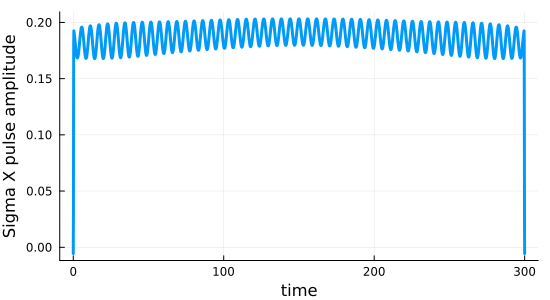

In [ ]:
fig2 = plot_pulse1(opt_result_LBFGSB.optimized_controls[1], tlist)

In [ ]:
ket_11= Vector{ComplexF64}([0, 0, 0, 1])
ket_00= Vector{ComplexF64}([1, 0, 0, 0])
ket_01= Vector{ComplexF64}([0, 1, 0, 0])
ket_10= Vector{ComplexF64}([0, 0, 1, 0])
bra_00=reshape(ket_00, (4, 1))
bra_01=reshape(ket_01, (4, 1))
bra_10=reshape(ket_10, (4, 1))
bra_11=reshape(ket_11, (4, 1))

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im

In [ ]:
obs00 = Float64[]
obs01 = Float64[]
obs10 = Float64[]
obs11 = Float64[]
psi_tj=ket_00
for i in 1:3000
    opt = opt_result_LBFGSB.optimized_controls[1][i]
    H_t = (-0.5) *( omega1 * Iσ̂_z +  omega2 * σ̂_zI )+ J* ( σ̂_z_z) + opt * Iσ̂_x
    U = exp(-1im * H_t * dt)
    psi_tj= U * psi_tj

    psi_t00= dot(bra_00 ,psi_tj)
    psi_t01= dot(bra_01 ,psi_tj)
    psi_t10= dot(bra_10 ,psi_tj)
    psi_t11= dot(bra_11 ,psi_tj)
    psi2_t00j= abs.(psi_t00[1]).^2
    psi2_t01j= abs.(psi_t01[1]).^2
    psi2_t10j= abs.(psi_t10[1]).^2
    psi2_t11j= abs.(psi_t11[1]).^2

    append!(obs00,psi2_t00j)
    append!(obs01,psi2_t01j)
    append!(obs10,psi2_t10j)
    append!(obs11,psi2_t11j)
end

println(obs00)
println(obs01)
println(obs10)
println(obs11)

[0.9999996953903082, 0.9999948188829203, 0.9998046997431368, 0.9989654653456425, 0.9973725660619097, 0.99508174161586, 0.9921295226691927, 0.9885608886719985, 0.9844283170112693, 0.9797907272103359, 0.9747123534886322, 0.969261579523476, 0.9635097683934546, 0.9575301185208576, 0.9513965731209109, 0.9451828064089043, 0.9389613048490062, 0.9328025563097715, 0.9267743543895851, 0.9209412196556486, 0.9153639343523897, 0.9100991825035638, 0.9051992834468061, 0.9007120038492831, 0.8966804312622868, 0.8931428913373043, 0.8901328909540035, 0.8876790706623012, 0.8858051519325822, 0.8845298676165856, 0.8838668675886147, 0.8838245955769702, 0.8844061375031279, 0.8856090460033865, 0.8874251499932054, 0.8898403619320354, 0.8928344986538332, 0.8963811340656369, 0.9004475035336705, 0.9049944802610849, 0.9099766433446697, 0.9153424554592543, 0.9210345652890961, 0.9269902459893391, 0.9331419762533777, 0.9394181651679842, 0.9457440161838448, 0.9520425194749632, 0.9582355559888105, 0.9642450908920318, 0.

In [ ]:
function plot_population1(pop00::Vector, pop01::Vector, pop10::Vector,pop11::Vector,tlist)
    fig = plot(tlist, pop00, label="00", xlabel="time", ylabel="population")
    plot!(fig, tlist, pop01; label="01")
    plot!(fig, tlist, pop10; label="10")
    plot!(fig, tlist, pop11; label="11")
end;

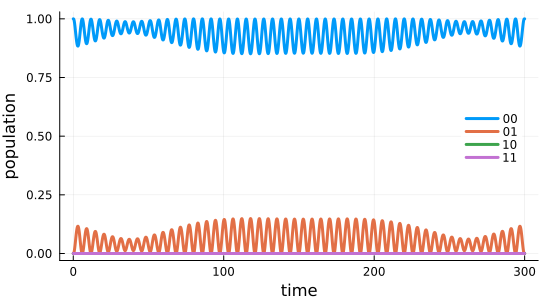

In [ ]:
plot_population1(obs00, obs01, obs10, obs11, tlist)

In [ ]:

obs200 = Float64[]
obs201 = Float64[]
obs210 = Float64[]
obs211 = Float64[]
psi_tj=ket_01
for i in 1:3000
    opt = opt_result_LBFGSB.optimized_controls[1][i]
    H_t = (-0.5) *( omega1 * Iσ̂_z +  omega2 * σ̂_zI )+ J* (σ̂_z_z ) + opt * Iσ̂_x
    U = exp(-1im * H_t * dt)
    psi_tj= U * psi_tj

    psi_t00= dot(bra_00 ,psi_tj)
    psi_t01= dot(bra_01 ,psi_tj)
    psi_t10= dot(bra_10 ,psi_tj)
    psi_t11= dot(bra_11 ,psi_tj)
    psi2_t00j= abs.(psi_t00[1]).^2
    psi2_t01j= abs.(psi_t01[1]).^2
    psi2_t10j= abs.(psi_t10[1]).^2
    psi2_t11j= abs.(psi_t11[1]).^2

    append!(obs200,psi2_t00j)
    append!(obs201,psi2_t01j)
    append!(obs210,psi2_t10j)
    append!(obs211,psi2_t11j)
end

println(obs200)
println(obs201)
println(obs210)
println(obs211)

[3.0460969150570966e-7, 5.1811170790583335e-6, 0.00019530025686301654, 0.0010345346543577266, 0.002627433938090495, 0.004918258384139861, 0.007870477330806864, 0.01143911132800093, 0.015571682988729853, 0.020209272789663283, 0.025287646511366935, 0.03073842047652339, 0.03649023160654465, 0.04246988147914135, 0.04860342687908774, 0.05481719359109445, 0.06103869515099269, 0.06719744369022754, 0.07322564561041378, 0.07905878034435007, 0.08463606564760834, 0.08990081749643422, 0.09480071655319208, 0.09928799615071526, 0.10331956873771168, 0.10685710866269403, 0.10986710904599511, 0.11232092933769747, 0.11419484806741621, 0.11547013238341289, 0.11613313241138426, 0.11617540442302872, 0.11559386249687116, 0.11439095399661282, 0.11257485000679357, 0.11015963806796375, 0.10716550134616597, 0.10361886593436255, 0.09955249646632877, 0.0950055197389144, 0.09002335665532947, 0.08465754454074509, 0.07896543471090282, 0.07300975401065961, 0.06685802374662077, 0.06058183483201454, 0.05425598381615375

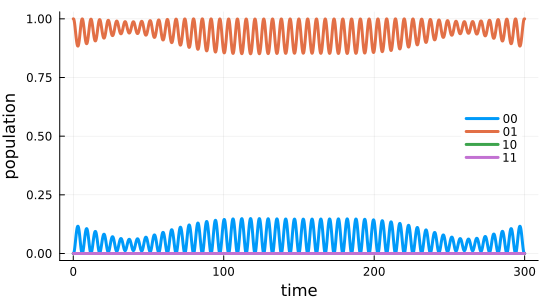

In [ ]:
plot_population1(obs200, obs201, obs210, obs211, tlist)

In [ ]:

obs300 = Float64[]
obs301 = Float64[]
obs310 = Float64[]
obs311 = Float64[]
psi_tj=ket_10
for i in 1:3000
    opt = opt_result_LBFGSB.optimized_controls[1][i]
    H_t = (-0.5) *( omega1 * Iσ̂_z +  omega2 * σ̂_zI )+ J* (σ̂_z_z ) + opt * Iσ̂_x
    U = exp(-1im * H_t * dt)
    psi_tj= U * psi_tj

    psi_t00= dot(bra_00 ,psi_tj)
    psi_t01= dot(bra_01 ,psi_tj)
    psi_t10= dot(bra_10 ,psi_tj)
    psi_t11= dot(bra_11 ,psi_tj)
    psi2_t00j= abs.(psi_t00[1]).^2
    psi2_t01j= abs.(psi_t01[1]).^2
    psi2_t10j= abs.(psi_t10[1]).^2
    psi2_t11j= abs.(psi_t11[1]).^2

    append!(obs300,psi2_t00j)
    append!(obs301,psi2_t01j)
    append!(obs310,psi2_t10j)
    append!(obs311,psi2_t11j)
end

println(obs300)
println(obs301)
println(obs310)
println(obs311)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

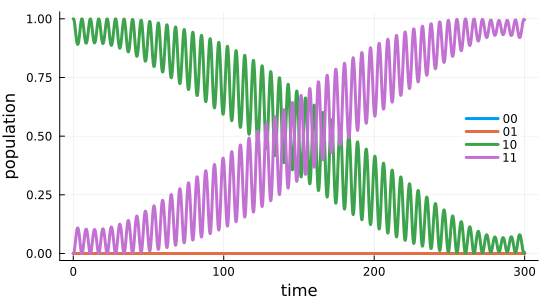

In [ ]:
plot_population1(obs300, obs301, obs310, obs311, tlist)

In [ ]:

obs400 = Float64[]
obs401 = Float64[]
obs410 = Float64[]
obs411 = Float64[]
psi_tj=ket_11
for i in 1:3000
    opt = opt_result_LBFGSB.optimized_controls[1][i]
    H_t = (-0.5) *( omega1 * Iσ̂_z +  omega2 * σ̂_zI )+ J* (σ̂_z_z ) + opt * Iσ̂_x
    U = exp(-1im * H_t * dt)
    psi_tj= U * psi_tj

    psi_t00= dot(bra_00 ,psi_tj)
    psi_t01= dot(bra_01 ,psi_tj)
    psi_t10= dot(bra_10 ,psi_tj)
    psi_t11= dot(bra_11 ,psi_tj)
    psi2_t00j= abs.(psi_t00[1]).^2
    psi2_t01j= abs.(psi_t01[1]).^2
    psi2_t10j= abs.(psi_t10[1]).^2
    psi2_t11j= abs.(psi_t11[1]).^2

    append!(obs400,psi2_t00j)
    append!(obs401,psi2_t01j)
    append!(obs410,psi2_t10j)
    append!(obs411,psi2_t11j)
end

println(obs400)
println(obs401)
println(obs410)
println(obs411)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

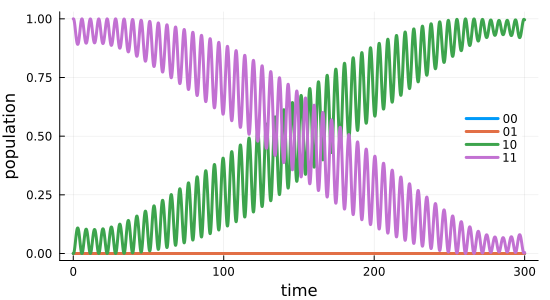

In [ ]:
plot_population1(obs400, obs401, obs410, obs411, tlist)